# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from collections import defaultdict
import difflib

import warnings
warnings.filterwarnings("ignore")

# Read Dataset



In [2]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [3]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,Sergei Rachmaninoff James Levine Berliner Phil...,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170202 entries, 0 to 170201
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170202 non-null  float64
 1   year              170202 non-null  int64  
 2   acousticness      170202 non-null  float64
 3   artists           170202 non-null  object 
 4   danceability      170202 non-null  float64
 5   duration_ms       170202 non-null  int64  
 6   energy            170202 non-null  float64
 7   explicit          170202 non-null  int64  
 8   id                170202 non-null  object 
 9   instrumentalness  170202 non-null  float64
 10  key               170202 non-null  int64  
 11  liveness          170202 non-null  float64
 12  loudness          170202 non-null  float64
 13  mode              170202 non-null  int64  
 14  name              170202 non-null  object 
 15  popularity        170202 non-null  int64  
 16  release_date      17

In [6]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# Clean Dataset

In [7]:
data.isnull().sum().sum()

0

In [8]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')
duplicate_rows = data[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []


In [9]:
# Check for duplicate rows
duplicates = genre_data.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')
duplicate_rows = genre_data[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [mode, genres, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, key]
Index: []


# Data Visualization

<Axes: xlabel='count', ylabel='decade'>

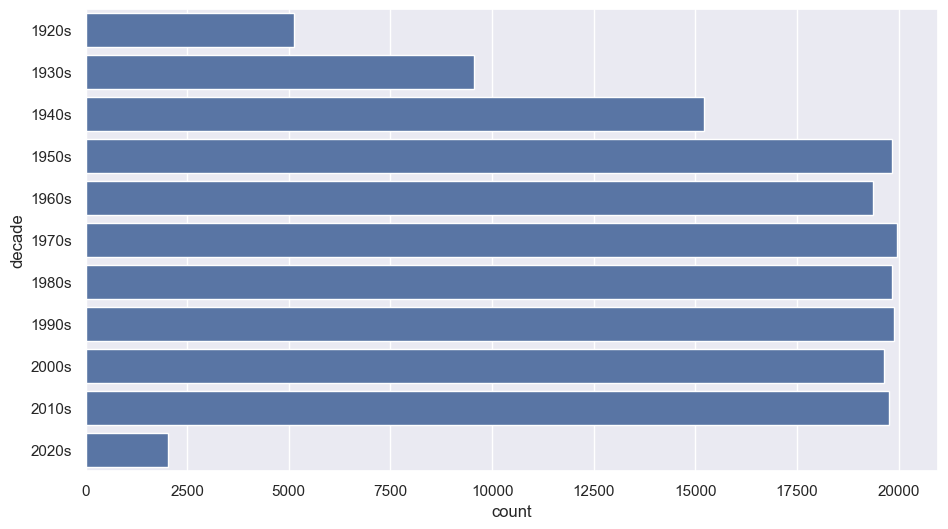

In [10]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

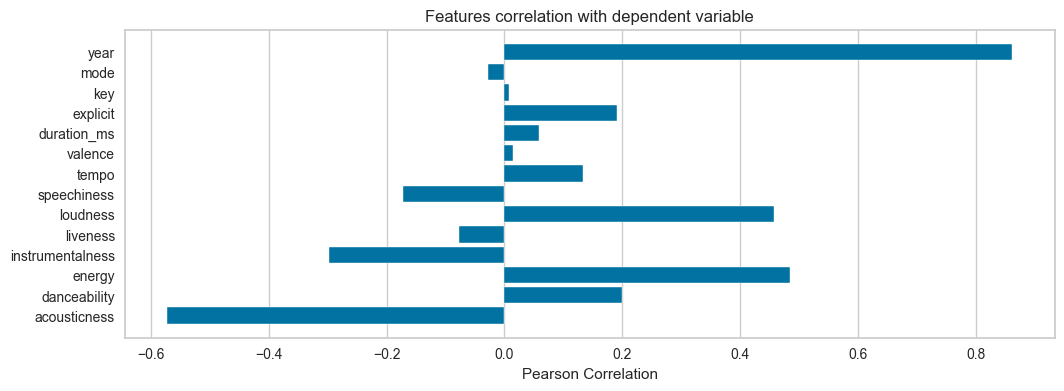

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [11]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(12,4)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [12]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features,title='Trend of various sound features over decades')
fig.show()

In [13]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group',
            title='Trend of various sound features over top 10 genres')
fig.show()

# Clustering Genres With K-Means

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=12))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [15]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X) # returns np-array of coordinates(x,y) for each record after TSNE.
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],title='Clusters of genres')
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.013s...
[t-SNE] Computed neighbors for 2973 samples in 0.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106125
[t-SNE] KL divergence after 1000 iterations: 1.393279


# Clustring Songs With K-Means

In [16]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=25,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'],title='Clusters of songs')
fig.show()

# Build Recommender System

In [18]:
!pip install spotipy

In [19]:
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# Prompt user for Spotify API credentials
CLIENT_ID = input('Please enter your Spotify Client ID: ')
CLIENT_SECRET = input('Please enter your Spotify Client Secret: ')

# Initialize Spotify client credentials
spotify = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)


In [20]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [21]:
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        print('Fetching song information from local dataset')
        return song_data

    except IndexError:
        print('Fetching song information from spotify dataset')
        return find_song(song['name'], song['year'])

def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))#nd-array where n is number of songs in list. It contains all numerical vals of songs in sep list.
    #print(f'song_matrix {song_matrix}')
    return np.mean(song_matrix, axis=0) # mean of each ele in list, returns 1-d array

def flatten_dict_list(dict_list):
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = [] # 'name', 'year'
    for dic in dict_list:
        for key,value in dic.items():
            flattened_dict[key].append(value) # creating list of values
    return flattened_dict

def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    #print(f'song_center {song_center}')
    scaler = song_cluster_pipeline.steps[0][1] # StandardScalar()
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    #print(f'distances {distances}')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')



In [22]:
recommend_songs([{'name': 'I Will Follow', 'year':2010},{'name': 'Come As You Are', 'year':1991}],  data)

Fetching song information from local dataset
Fetching song information from local dataset


[{'name': 'Face Down', 'year': 2006, 'artists': 'The Red Jumpsuit Apparatus'},
 {'name': 'BURN IT DOWN', 'year': 2012, 'artists': 'Linkin Park'},
 {'name': 'The Last Stand', 'year': 2016, 'artists': 'Sabaton'},
 {'name': 'In Your Eyes (feat. Kenny G) - Remix',
  'year': 2020,
  'artists': 'The Weeknd Kenny G'},
 {'name': 'Pray to God (feat. HAIM)',
  'year': 2014,
  'artists': 'Calvin Harris HAIM'},
 {'name': '空に歌えば', 'year': 2017, 'artists': 'amazarashi'},
 {'name': 'Stranded', 'year': 2016, 'artists': 'Gojira'},
 {'name': 'Tequila - R3HAB Remix', 'year': 2018, 'artists': 'Dan  Shay R3HAB'},
 {'name': 'Charlie', 'year': 2006, 'artists': 'Red Hot Chili Peppers'},
 {'name': 'War of Change', 'year': 2012, 'artists': 'Thousand Foot Krutch'}]